In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_full.csv')

In [3]:
df.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df = df.drop(columns='Unnamed: 0')

In [7]:
df.shape

(1309, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [9]:
df.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [10]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
df.dropna(axis=1,thresh=500,inplace=True) # Thershold....

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [13]:
df[df['Embarked'].isnull()] # Onde estão os valores nulos ? 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [14]:
#Filtrando -+ onde esta a maioria

df[df['Survived']==1][df['Pclass']==1][df['Sex']=='female'][df['Fare']==80]

C:\Users\rodri\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rodri\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [15]:
df['Embarked'].fillna('C',inplace=True)

In [16]:
df[df['Embarked'].isnull()] # Onde estão os valores nulos ? 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [18]:
df[df['Age'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [19]:
df['Age'].isnull().sum()

263

In [20]:
df[df['Age'],df['Sex']=='male'].mean()

TypeError: '(0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64, 0        True
1       False
2       False
3       False
4        True
        ...  
1304     True
1305    False
1306     True
1307     True
1308     True
Name: Sex, Length: 1309, dtype: bool)' is an invalid key

In [21]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [22]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [24]:
df['Age'].describe()

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [25]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [27]:
df['Embarked'].nunique()

3

#esse é o código básico para o boxplot com seaborn (as sns)
sns.boxplot(x=’dado_categórico’, y=’dados_numérico’, data=df) 


In [28]:
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Age'>

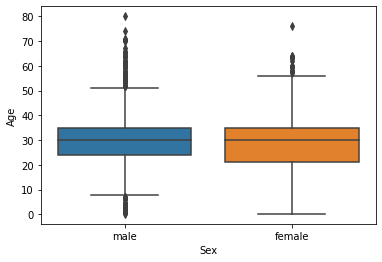

In [29]:
sns.boxplot(x='Sex',y='Age',data=df)

Criando classes baseada na idades

In [30]:
#vamos criar os limites das faixas etárias para os nossos dados  
age_cat_edges = [0, 3, 12, 18, 35, 60, 1000]


In [31]:
#crie uma nova coluna :: selecione a coluna base
df['age_cat'] = pd.cut(df['Age'],                            
                             #aplique os limites de cada categoria
                             age_cat_edges, 
                             #nomei cada categoria
                             labels=['Babies','Children','Teen',
                                     'Adult','MidAge','Senior'])

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,MidAge
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S,Adult
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,MidAge
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,MidAge
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S,Adult


<AxesSubplot:xlabel='age_cat', ylabel='Age'>

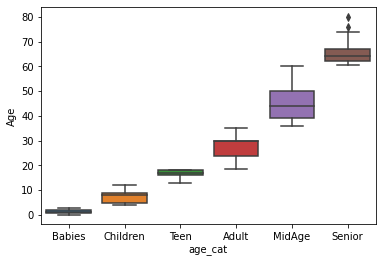

In [33]:
sns.boxplot(x='age_cat',y='Age',data=df)

In [34]:
pd.pivot_table(df,values=['Survived'],index=['Sex','age_cat'],columns=['Pclass'],aggfunc='count',margins=True).round()

Survived                    
Pclass                 1      2      3   All
Sex    age_cat                              
female Babies        1.0    4.0   14.0    19
       Children      NaN    9.0   16.0    25
       Teen         12.0    8.0   28.0    48
       Adult        64.0   61.0  135.0   260
       MidAge       61.0   24.0   22.0   107
       Senior        6.0    NaN    1.0     7
male   Babies        1.0    9.0   12.0    22
       Children      3.0    2.0   23.0    28
       Teen          4.0   10.0   37.0    51
       Adult        72.0  102.0  360.0   534
       MidAge       84.0   42.0   56.0   182
       Senior       15.0    6.0    5.0    26
All                323.0  277.0  709.0  1309

Criando um Heat Map c/ crosstab

In [1]:
pd.crosstab(index=df["Pclass"],columns=[df['Sex'],df['age_cat']],normalize=True)

NameError: name 'pd' is not defined

In [36]:
cross = pd.crosstab(index=df["Pclass"],columns=[df['Sex'],df['age_cat']],normalize=True).T
cross

Pclass                  1         2         3
Sex    age_cat                               
female Babies    0.000764  0.003056  0.010695
       Children  0.000000  0.006875  0.012223
       Teen      0.009167  0.006112  0.021390
       Adult     0.048892  0.046600  0.103132
       MidAge    0.046600  0.018335  0.016807
       Senior    0.004584  0.000000  0.000764
male   Babies    0.000764  0.006875  0.009167
       Children  0.002292  0.001528  0.017571
       Teen      0.003056  0.007639  0.028266
       Adult     0.055004  0.077922  0.275019
       MidAge    0.064171  0.032086  0.042781
       Senior    0.011459  0.004584  0.003820

<AxesSubplot:xlabel='Pclass', ylabel='Sex-age_cat'>

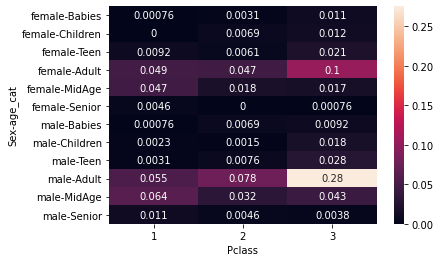

In [37]:
sns.heatmap(cross,annot=True)

In [38]:
import matplotlib.pyplot as plt

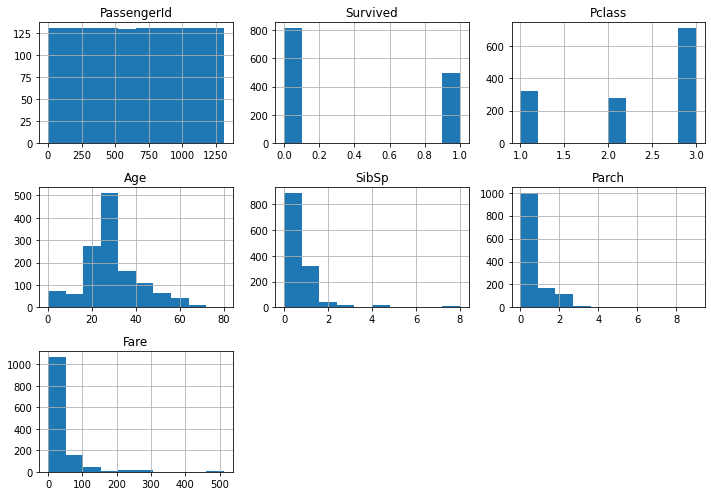

In [39]:
plt.clf
df.hist(figsize=(10,7)) # transforma meu Data Frame em distribuições...
plt.tight_layout()
plt.show()

C:\Users\rodri\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

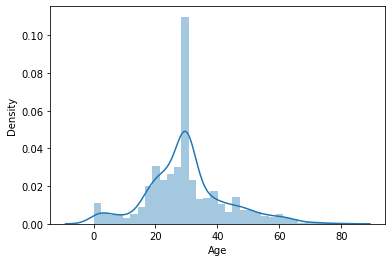

In [40]:
sns.distplot(df['Age'])

TypeError: alpha must be a float or None

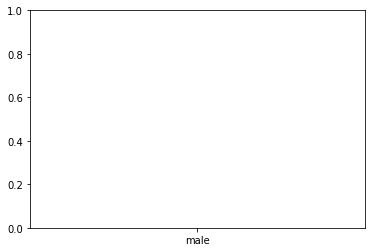

In [41]:
df.plot('Sex','Survived',kind='scatter',alpha='0.1')

TypeError: alpha must be a float or None

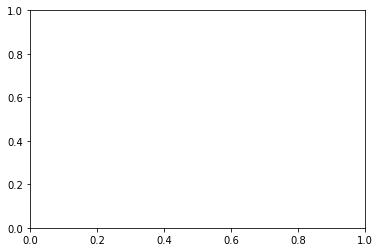

In [42]:
df.plot('Age','Fare',kind='scatter',alpha='0.1')

TypeError: alpha must be a float or None

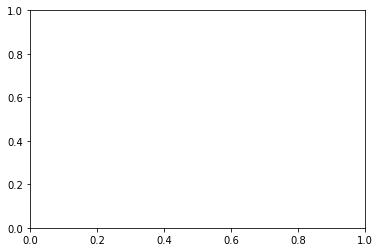

In [43]:
df.plot('Fare','Pclass',kind='scatter',alpha='0.1')

In [44]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.025731,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.264710,-0.048483,0.002370,0.108919,0.233622
Pclass,-0.038354,-0.264710,1.000000,-0.366371,0.060832,0.018322,-0.558629
Age,0.025731,-0.048483,-0.366371,1.000000,-0.190747,-0.130872,0.171893
SibSp,-0.055224,0.002370,0.060832,-0.190747,1.000000,0.373587,0.160238
Parch,0.008942,0.108919,0.018322,-0.130872,0.373587,1.000000,0.221539
Fare,0.031428,0.233622,-0.558629,0.171893,0.160238,0.221539,1.000000


In [28]:
sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1)

NameError: name 'sns' is not defined

PairPlot
E se fosse possível com um só comando visualizar as relações e distribuições entre de todas as variáveis do dataset em uma matriz? É exatamente isso o que faz o Pair Plot da biblioteca Seaborn.
Essa função cria uma espécie de sumário visual de seus dados. Plotando todos contra todos em um scatter plot e na diagonal das features com elas mesmas, ela exibe um gráfico de distribuição ou um histograma.


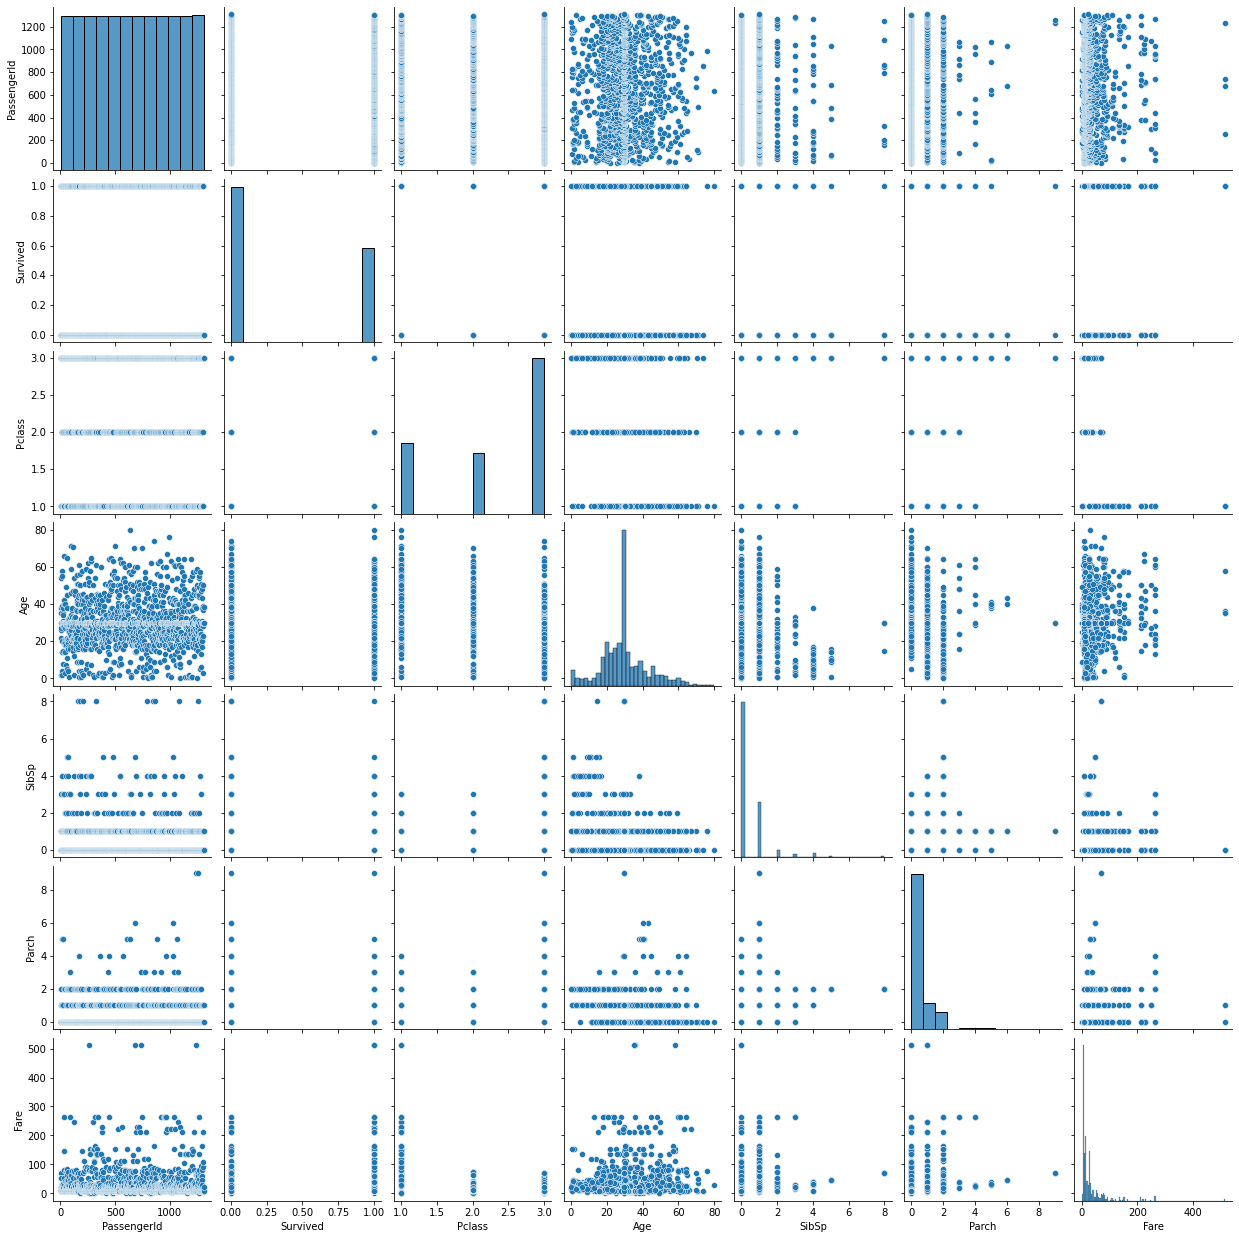

In [45]:
sns.pairplot(df)

Pandas profiling
Agora é hora da verdadeira bruxaria. Uma análise detalhada que inspeciona todas as linhas e colunas, fazendo alertas e tudo o mais. Mas tudo isso vem com um enorme custo computacional. Então cuidado. Use com sabedoria.


#pelo cmd do anaconda: conda install -c conda-forge pandas-profiling

In [46]:
from pandas_profiling import ProfileReport

In [47]:
profile= ProfileReport(df, Title='Titanic Dataset', 
                       html={'stile':{'full_width':True}})

TypeError: describe_boolean_1d() got an unexpected keyword argument 'Title'